In [28]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load datasets
loan_data = pd.read_excel(
    r'E:\Python_Data projects\Loan Analysis Project\loandataset.xlsx'
)

In [30]:
# CSV file (note the sep=';' since it uses semicolons)
customer_data = pd.read_csv(
    r'E:\Python_Data projects\Loan Analysis Project\customer_data.csv',
    sep=';'
)

In [31]:
# Display first few rows of each dataset
print("Loan Data Sample:")
display(loan_data.head())

Loan Data Sample:


,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.04167,50,0.3,0,0,0,0
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,50,0.3,0,0,0,0
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.00000,2751,16.7,0,0,0,0
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.95833,17214,8.1,2,1,0,0
4,93,C93,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.95833,61921,39.1,0,0,0,0


In [32]:
print("Customer Data Sample:")
display(customer_data.head())

Customer Data Sample:


,id,first_name,last_name,email,gender,city,country
0,C1,Rafaelia,Constable,rconstable0@google.co.jp,Female,Kazanskoye,Russia
1,C2,Rayner,Langhor,rlanghor1@arstechnica.com,Male,Yauca,Peru
2,C3,Felike,Duchesne,fduchesne2@blog.com,Male,Monte Santo de Minas,Brazil
3,C4,Kelli,Winchcomb,kwinchcomb3@tuttocitta.it,Female,Červené Pečky,Czech Republic
4,C5,Timi,Butterley,tbutterley4@jalbum.net,Female,Lorino,Russia


In [33]:
# Merge datasets
complete_data = pd.merge(
    loan_data, 
    customer_data, 
    left_on='customerid', 
    right_on='id'
)
complete_data.head()

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,delinq.2yrs,pub.rec,not.fully.paid,id,first_name,last_name,email,gender,city,country
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.04167,...,0,0,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,...,0,0,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.00000,...,0,0,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.95833,...,1,0,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan
4,93,C93,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.95833,...,0,0,0,C93,Anita,Harcus,aharcus2k@jiathis.com,Female,NaN,NaN


In [34]:
# Check for missing values
complete_data.isnull().sum()

loan id               0
customerid            0
credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs           0
pub.rec               0
not.fully.paid        0
id                    0
first_name            0
last_name             0
email                 0
gender                0
city                 11
country              11
dtype: int64

In [35]:
#  Drop missing values
complete_data = complete_data.dropna()
complete_data.isnull().sum()

loan id              0
customerid           0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
id                   0
first_name           0
last_name            0
email                0
gender               0
city                 0
country              0
dtype: int64

In [36]:
# Check for duplicate rows
complete_data.duplicated().sum()

0

In [37]:
# Drop duplicate rows
complete_data = complete_data.drop_duplicates()
complete_data.shape

(988, 23)

In [38]:
# Ex.: simple function to add numbers
def add_numbers(number1, number2):
    return number1 + number2

result = add_numbers(10, 25)
print("Sum:", result)

Sum: 35


In [39]:
# Function to categorize loan purposes
def categorize_purpose(purpose):
    if purpose in ['credit_card', 'debt_consolidation']:
        return 'Financial'
    elif purpose in ['educational', 'small_business']:
        return 'Educational/Business'
    else:
        return 'Other'

# Apply the function
complete_data['purpose_category'] = complete_data['purpose'].apply(categorize_purpose)
complete_data[['purpose', 'purpose_category']].head()


,purpose,purpose_category
0,debt_consolidation,Financial
1,debt_consolidation,Financial
2,all_other,Other
3,small_business,Educational/Business
5,credit_card,Financial


In [40]:
#  Function with conditional statements
def check_number(number):
    if number > 0:
        return "+ve"
    elif number < 0:
        return "-ve"
    else:
        return "Zero"

print(check_number(-90))


-ve


In [41]:
# Assess risk based on multiple conditions
def assess_risk(row):
    if row['dti'] > 20 and row['delinq.2yrs'] > 2 and row['revol.util'] > 60:
        return 'High Risk'
    else:
        return 'Low Risk'

complete_data['Risk'] = complete_data.apply(assess_risk, axis=1)
complete_data[['dti','delinq.2yrs','revol.util','Risk']].head()


,dti,delinq.2yrs,revol.util,Risk
0,1.20,0,0.3,Low Risk
1,0.22,0,0.3,Low Risk
2,2.24,0,16.7,Low Risk
3,17.12,1,8.1,Low Risk
5,7.08,0,35.9,Low Risk


In [42]:
# Categorize FICO scores
def categorize_fico(fico_score):
    if 800 <= fico_score <= 850:
        return 'Excellent'
    elif 740 <= fico_score < 800:
        return 'Very Good'
    elif 670 <= fico_score < 740:
        return 'Good'
    elif 580 <= fico_score < 670:
        return 'Fair'
    else:
        return 'Poor'

complete_data['Fico_category'] = complete_data['fico'].apply(categorize_fico)
complete_data[['fico','Fico_category']].head()


,fico,Fico_category
0,812,Excellent
1,812,Excellent
2,792,Very Good
3,747,Very Good
5,767,Very Good


In [43]:
#  Identify customers with high inquiries & public records
def identify_high_inq_derog(row):
    avg_inq = complete_data['inq.last.6mths'].mean()
    avg_derog = complete_data['pub.rec'].mean()
    
    if row['inq.last.6mths'] > avg_inq and row['pub.rec'] > avg_derog:
        return True
    else:
        return False

complete_data['High_Inquiries_and_Public_Records'] = complete_data.apply(identify_high_inq_derog, axis=1)
complete_data[['inq.last.6mths','pub.rec','High_Inquiries_and_Public_Records']].head()


,inq.last.6mths,pub.rec,High_Inquiries_and_Public_Records
0,0,0,False
1,0,0,False
2,0,0,False
3,2,0,False
5,0,0,False


In [44]:
#  Create a class for summary statistics
class DataAnalysis:
    def __init__(self, df, column_name):
        self.df = df
        self.column_name = column_name
        
    def calculate_mean(self):
        return self.df[self.column_name].mean()
    
    def calculate_median(self):
        return self.df[self.column_name].median()

analysis = DataAnalysis(complete_data, 'fico')
print("Mean FICO Score:", analysis.calculate_mean())
print("Median FICO Score:", analysis.calculate_median())


Mean FICO Score: 713.3056680161943
Median FICO Score: 707.0


In [45]:
# Data Visualizations
sns.set_style('darkgrid')

C:\Users\Asus\AppData\Local\Temp\ipykernel_6792\1684946528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purpose', data=complete_data, palette='dark')


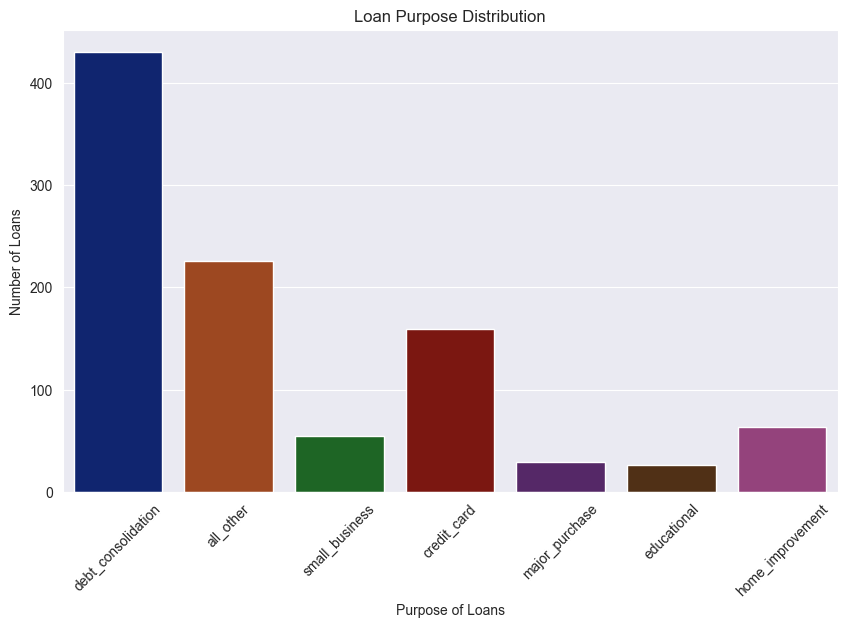

In [46]:
# Bar plot: Loan purpose distribution
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', data=complete_data, palette='dark')
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose of Loans')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

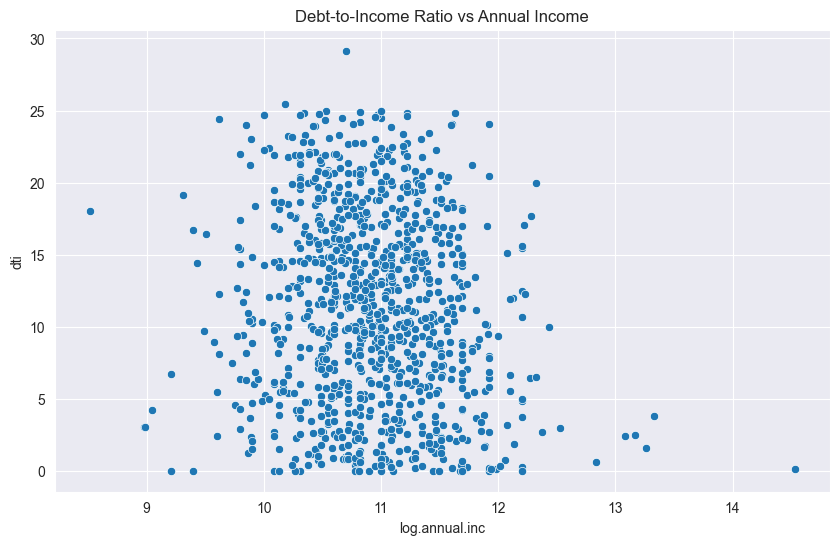

In [47]:
# Scatter plot: Debt-to-Income Ratio vs Income
plt.figure(figsize=(10,6))
sns.scatterplot(x='log.annual.inc', y='dti', data=complete_data)
plt.title('Debt-to-Income Ratio vs Annual Income')
plt.show()

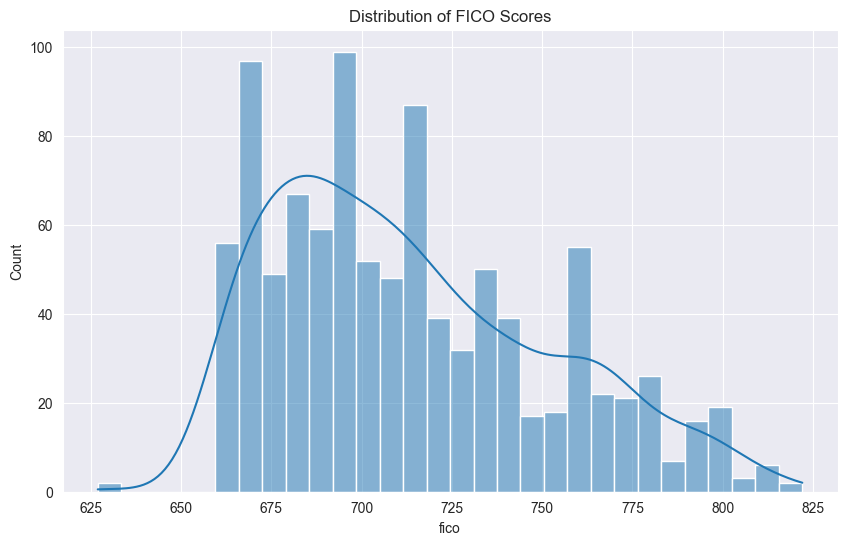

In [48]:
# Distribution plot: FICO Scores
plt.figure(figsize=(10,6))
sns.histplot(complete_data['fico'], bins=30, kde=True)
plt.title('Distribution of FICO Scores')
plt.show()

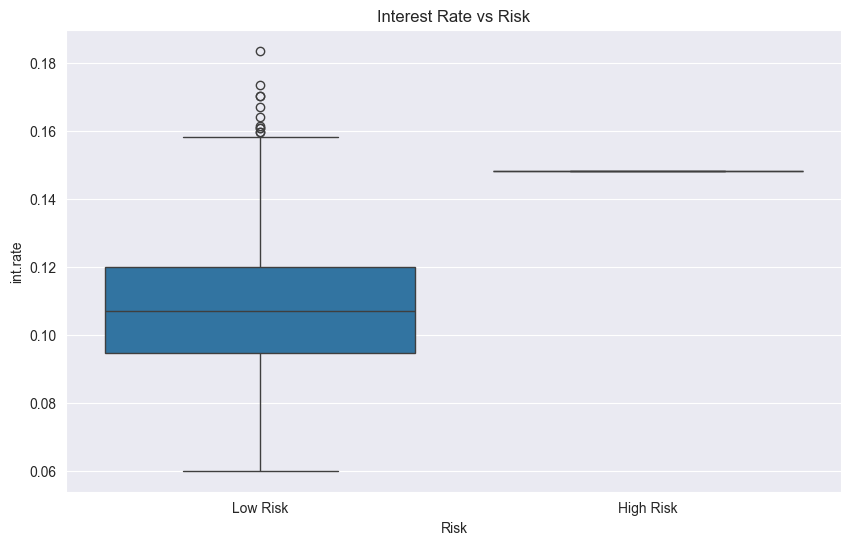

In [49]:
# Box plot: Interest Rate vs Risk
plt.figure(figsize=(10,6))
sns.boxplot(x='Risk', y='int.rate', data=complete_data)
plt.title('Interest Rate vs Risk')
plt.show()